# Clustering of DIME embeddings of WSI patches

### By Elsa Jonsson, Embeddings provided by AstraZeneca

In this notebook i will take DIME embeddings of tumour patches of the Camelyon16 dataset and create a binary classifier using a Gradient Boosting network

### If not working in my docker container, run this line first:

In [1]:
! pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/scp/software/Python/3.9.5-GCCcore-10.3.0/bin/python3.9 -m pip install --upgrade pip' command.


### If you are working in the docker container from the resp. start here:

In [2]:
from utils import *

## Load & inspect data

In [3]:
# INPAINTING
folder_inpainting_train = 'Camelyon16/inpainting/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_inpainting_test = 'Camelyon16/inpainting/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'

In [5]:
# INPAINTING
embeddings_inpainting_train, classes_inpainting_train, patch_information_inpainting_train = load_data(folder_inpainting_train)
embeddings_inpainting_train, embeddings_inpainting_test, classes_inpainting_train, classes_inpainting_test, patch_information_inpainting_train, patch_information_inpainting_test = sort_train_test(embeddings_inpainting_train, classes_inpainting_train, patch_information_inpainting_train)

In [6]:
print_data(9999, embeddings_inpainting_train, classes_inpainting_train, patch_information_inpainting_train)

---------------- EMBEDDING -----------------------
[7.41712982e-03 4.87098470e-02 4.55160588e-02 6.72523165e-05
 6.76188990e-02 1.80352596e-03 2.81082708e-02 1.06640622e-01
 4.58478071e-02 3.41291800e-02 2.50343923e-02 5.48104718e-02
 2.27977261e-02 2.34034844e-02 3.71418074e-02 8.83371308e-02
 7.92831182e-02 2.38732379e-02 1.06051788e-01 2.71834806e-02
 1.35223987e-02 5.02797663e-02 4.06470895e-03 2.26685475e-03
 7.96845555e-03 1.56139508e-02 1.15335554e-01 1.10797033e-01
 4.45721112e-02 4.39395085e-02 7.98089132e-02 2.35555004e-02
 3.17283091e-03 7.23395497e-02 1.66377835e-02 2.98650488e-02
 3.22715938e-03 5.90924807e-02 2.65250611e-03 1.69568602e-02
 7.13715851e-02 3.35715339e-02 2.28778031e-02 1.31098581e-02
 4.22034459e-03 8.64332095e-02 1.01765320e-01 1.44570495e-03
 3.53542380e-02 0.00000000e+00 1.03555853e-02 4.55004573e-02
 1.07379910e-02 1.28194531e-02 5.48646646e-03 8.62159953e-03
 1.24087064e-02 9.97104794e-02 9.14450083e-03 4.45629284e-03
 2.19683405e-02 5.61297536e-02 7.6

In [7]:
print("-----------NUM inpainting EMBEDDINGS TRAIN-------------")
print(len(embeddings_inpainting_train))
print("-----------NUM inpainting EMBEDDINGS TEST-------------")
print(len(embeddings_inpainting_test))
print("------------------------")

-----------NUM inpainting EMBEDDINGS TRAIN-------------
1353990
-----------NUM inpainting EMBEDDINGS TEST-------------
701967
------------------------


## Gradient Boosting

### Percentage tests

---------------------------------------
PERCENTAGE: 10.0% OF DATASET, NUMBER EMBEDDINGS: 135399
HYPERPARAMETERS: learning_rate = 0.1, n_estimators = 100, max_depth = 3, min_samples_split = 2,  min_samples_leaf = 1, max_features = None
RUNTIME IN SEC: 2495.820245742798
ACCURACY:
0.948600147870199
AUC & ROC CURVE:


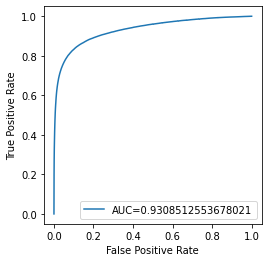

PRECISION RECALL CURVE:


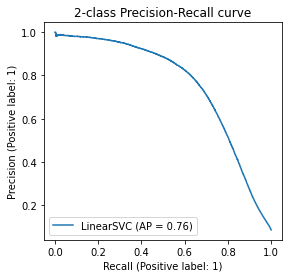

CONFUSION MATRIX:


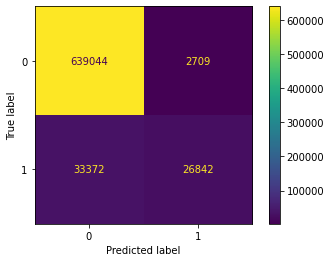

---------------------------------------


In [9]:
runGBPercentage(embeddings_inpainting_train, classes_inpainting_train, embeddings_inpainting_test, classes_inpainting_test, [0.1])